<a href="https://colab.research.google.com/github/BasmaAfreen/Stats-DeepLearning_Projects/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taskes:
- 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
- 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
- 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
- 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
- 5.Apply Lasso and Ridge methods on the model.


In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [ ]:

df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [ ]:
# 1
df['Price'].sum()

15409464

In [ ]:
# 2
df.groupby("Fuel_Type")['Price'].sum()    # as we can see petrol prize is higher

Fuel_Type
CNG         160160
Diesel     1750656
Petrol    13498648
Name: Price, dtype: int64

In [ ]:
# 3
df.groupby("Automatic")['Price'].sum()     # non automatic priz i more
                                                # from 1 2 3 we can conclude that car which is non automaticc and car run on   petrol  prize is moreeeee

Automatic
0    14511494
1      897970
Name: Price, dtype: int64

In [ ]:
df.groupby("Fuel_Type")['Age_08_04'].mean()

Fuel_Type
CNG       56.352941
Diesel    50.722581
Petrol    56.582278
Name: Age_08_04, dtype: float64

In [ ]:
df.groupby("Automatic")['HP'].sum()    # non automatic engin power more

Automatic
0    137572
1      8185
Name: HP, dtype: int64

# summary statistics

In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Observations:

Price:

The average price of the vehicles in the dataset is around 10,730.82.
Prices range significantly from a minimum of 4,350 to a maximum of 32,500.
The standard deviation of 3,626.96 indicates a considerable spread in prices.
Vehicle prices range from 4,350 to 32,500, indicating a wide price spectrum.

Age:
The average age of the vehicles is approximately 55.95 years.
Ages range from 1 to 80 years.
The standard deviation of 18.6 suggests a moderate spread in vehicle ages .

KMHP:
The average kilometer per hour reading is 68,533.26.
The range extends from 1,300 to 243,000 kilometers per hour.
The standard deviation of 37,506.45 indicates a high degree of variability in kilometer per hour readings.
There's a substantial range in kilometer per hour readings, suggesting diverse usage patterns or potential outliers.

Automatic :
This likely represents whether the vehicle has an automatic transmission.
The mean of 0.0557 suggests that a very small proportion of vehicles in the dataset have automatic transmissions.

cc:

This likely refers to the engine displacement in cubic centimeters.
The average engine displacement is around 1,576.86 cc.
The range spans from 1,300 cc to 16,000 cc.
The standard deviation of 424.39 indicates a considerable variation in engine sizes.
Engine sizes vary considerably, from smaller to very large displacements.

Doors:

The average number of doors is 4.03.
The range is from 2 to 5 doors.
The standard deviation of 0.95 suggests a relatively small variation in the number of doors.
Cylinders:

The average number of cylinders is 4.05.
The range is from 3 to 5 cylinders.
The standard deviation of 0.19 indicates a very small variation in the number of cylinders.
All vehicles in the dataset have 4 cylinders.
Gears:

The average number of gears is 5.02.
The range is from 3 to 6 gears.
The standard deviation of 0.19 suggests a very small variation in the number of gears.
Weight:

The average weight of the vehicles is 1,072.46.
The range extends from 1,000 to 1,615.
The standard deviation of 52.64 indicates a moderate spread in vehicle weights.
Count:

This likely represents the number of observations for each variable.
The count for all variables is 1,436, indicating that the dataset contains 1,436 data points.
Possible Insights:

Price Variation: Prices exhibit a wide range and a high standard deviation, suggesting significant factors influencing vehicle prices within this dataset.
Age Distribution: The average age is relatively high, and the range is broad, indicating a diverse mix of older and newer vehicles.
Engine Size & Power: The variation in engine displacement (cc) and the presence of automatic transmissions suggest a range of vehicle types and performance levels

- In this columns mean = median [Cylinders,weight] confirms a  skewed distribution or following normal distribution its confirm that no there is no  outliers.
-In this columns [doors , gears] The mean is close to the median, suggesting a roughly symmetrical distribution.
- std div is 0 means datapoints are clustred around mean(4).
-
- In this columns mean > median [price, km ] confirms a  postive skewed distribution due to outliers.
-
- [the presence of a few very high-priced vehicles,there are some vehicles with very high kilometer per hour readings that are pulling the average upThis is likely due to a few vehicles with very large engines].
-
- In this columns mean < median [Age_08_04 , HP , cc ] confirms a  negative skewed distribution due to outliers.
-
- **low-Std**: moderate std  in this  columns[price, age ,  hp ,cc, doors ,gears ,weight] indicates datapoints  are not  widely spread out ,and few outliers can be found.
- **high-Std**: high std  in this  columns[km ] indicates datapoints  are   widely spread out and high variation between datapoints.

-****When the age of the Toyota Corolla is around 6-7 years and it has traveled approximately 63,389 km, with an engine power of around 110 hp,
is not automatic, has 4 cylinders, and 5 gears, and weighs about 1,070 kg, its price should be around $9,900."****

# visualization

## histogram: obsrve var following ND OR not

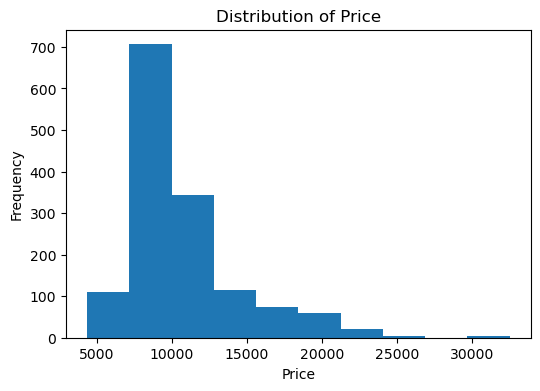

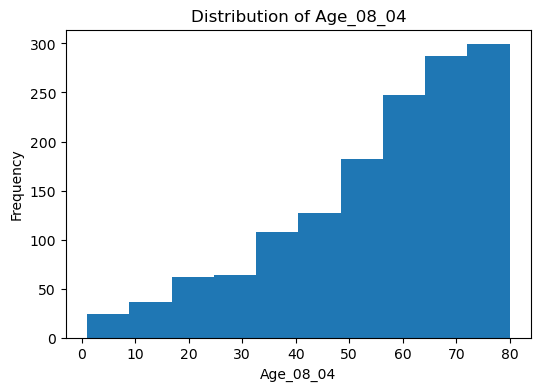

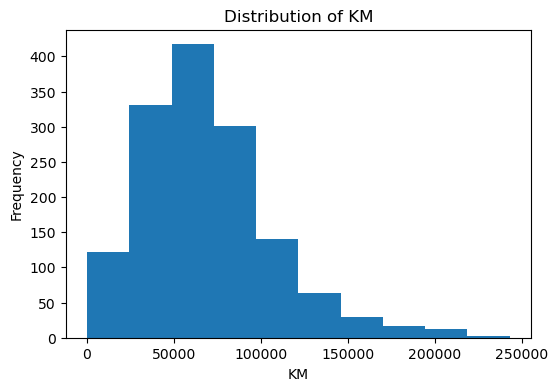

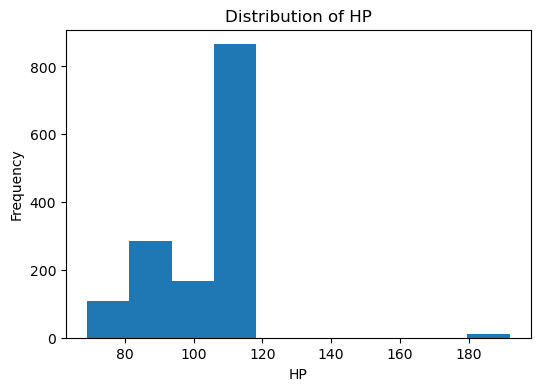

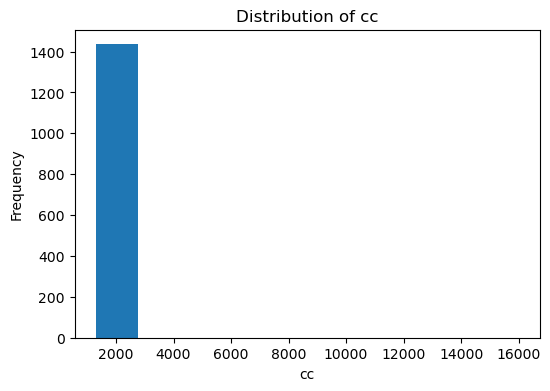

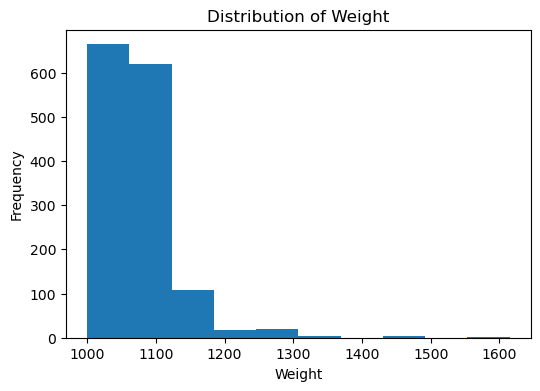

1.0159121980877577

In [ ]:
# in above dataset all col datatype is int. But few are Continous and discrete(countable).
# Selecting continous columns and placing in list.
continous_var=['Price','Age_08_04', 'KM', 'HP','cc','Weight']

# Plot hist for each continous column using matplotlib to analyse data distribution
# Loop through each continous  column and plot histogram
for col in continous_var:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
df["KM"].skew()

- as we can cleary observe in this variables [price ,km , weight] **most of  data is ditributed on left side & The tail on the right side is longer
indicating POSITIVE(right) skewness due presence of outliers**  
- as we can cleary observe in this variables [hp ,age ] **most of  data is ditributed on right side & The tail on the leftt side is longer
indicating negative(right) skewness due presence of outliers**

-While the mean and median of the "Weight" variable are close, the histogram clearly shows a right-skewed distribution.
This suggests that even though the mean and median are similar, there are likely a few vehicles with significantly higher weights that are pulling
the distribution to the right.

Possible Explanations:

-Outliers: The presence of a few very heavy vehicles can disproportionately influence the mean, pulling it slightly higher than the median. These heavy vehicles would create a longer tail on the right side of the distribution.

In [ ]:
#skew ness range -3 to +3
# using select_dtypes ()function to selct only numerical  variables because there is one categorical col in middle (fuel)  of a dataset .
numerical_data = df.select_dtypes(include=["number"])
numerical_data.skew()
# not follwing normal ditribution

Price         1.703885
Age_08_04    -0.826702
KM            1.015912
HP            0.955836
Automatic     3.878197
cc           27.431793
Doors        -0.076395
Cylinders     0.000000
Gears         2.283960
Weight        3.108639
dtype: float64

C:\Users\Basma\AppData\Local\Temp\ipykernel_1544\2550840887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='pastel')


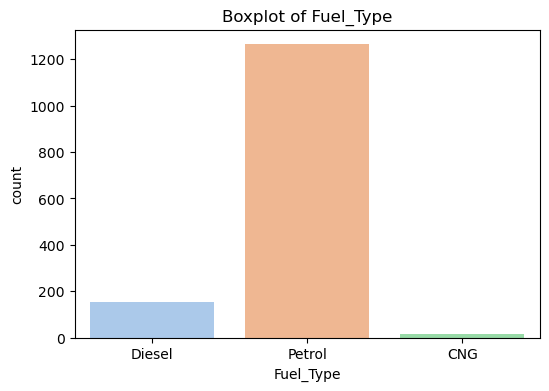

C:\Users\Basma\AppData\Local\Temp\ipykernel_1544\2550840887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='pastel')


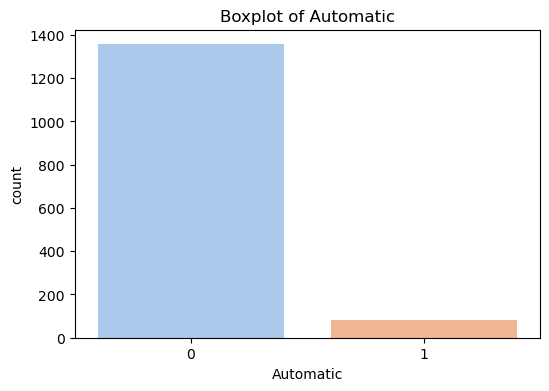

C:\Users\Basma\AppData\Local\Temp\ipykernel_1544\2550840887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='pastel')


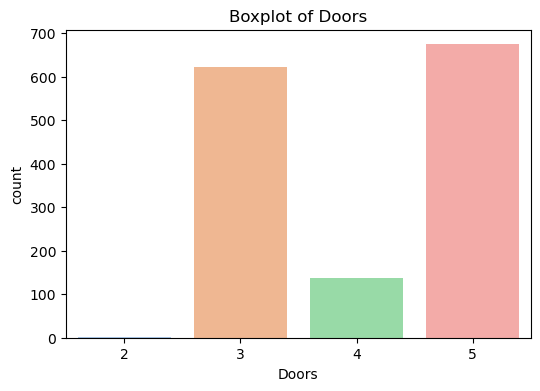

C:\Users\Basma\AppData\Local\Temp\ipykernel_1544\2550840887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='pastel')


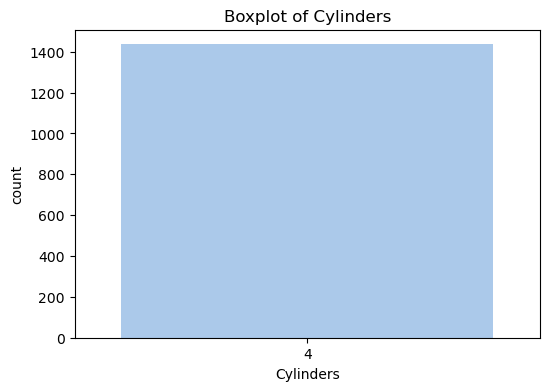

C:\Users\Basma\AppData\Local\Temp\ipykernel_1544\2550840887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='pastel')


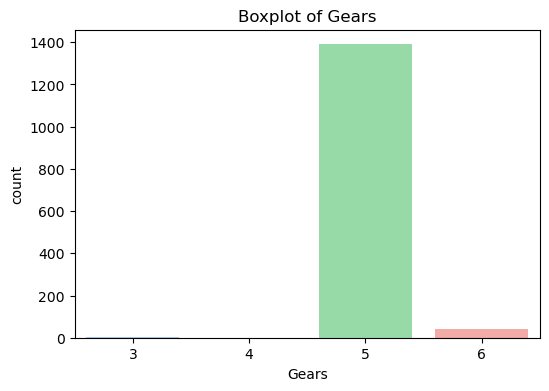

In [ ]:
#this are discrete datatype but stored as integers.
# Selecting discrete columns and placing in list.
category_col=['Fuel_Type','Automatic','Doors','Cylinders','Gears']

#category_col=df.select_dtypes(include=['object']).columns  selects only one bcz only one var is of object type

# Plot countplot(bar graph) for each discrete column using matplotlib to  compare categories.
# Loop through each continous  column and plot countplot
for col in category_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col],palette='pastel')
    plt.title(f"Boxplot of {col}")
    plt.show()


- *The majority of cars run on petrol. Most of these cars are not automatic, have between 3 to 5 doors, 5 gears, and 4 cylinders."*

In [ ]:
numeric_data = df.select_dtypes(include=["number"])
# Calculate the correlation  range in between -1  to +1
corr_matrix = numeric_data.corr()
# Display the correlation matrix
print(corr_matrix)
# hp and km -0.333538   have more relation than hp and price

              Price  Age_08_04        KM        HP  Automatic        cc  \
Price      1.000000  -0.876590 -0.569960  0.314990   0.033081  0.126389   
Age_08_04 -0.876590   1.000000  0.505672 -0.156622   0.031717 -0.098084   
KM        -0.569960   0.505672  1.000000 -0.333538  -0.081854  0.102683   
HP         0.314990  -0.156622 -0.333538  1.000000   0.013144  0.035856   
Automatic  0.033081   0.031717 -0.081854  0.013144   1.000000  0.066740   
cc         0.126389  -0.098084  0.102683  0.035856   0.066740  1.000000   
Doors      0.185326  -0.148359 -0.036197  0.092424  -0.027654  0.079903   
Cylinders       NaN        NaN       NaN       NaN        NaN       NaN   
Gears      0.063104  -0.005364  0.015023  0.209477  -0.098555  0.014629   
Weight     0.581198  -0.470253 -0.028598  0.089614   0.057249  0.335637   

              Doors  Cylinders     Gears    Weight  
Price      0.185326        NaN  0.063104  0.581198  
Age_08_04 -0.148359        NaN -0.005364 -0.470253  
KM        -0.03

- The age(-0.87) variable has highest (strong negative correlation )correlation with PRICE .it means age is very imp in predicting the price.
- The weight 0.58  variable has also have  strong poitive correlation  which hepls  in PRICE prediction .
- The km -0.56  variable has also have  strong negative correlation  which hepls  in PRICE prediction .
- this variables have week positive correlation  hp 0.31   cc 0.12,  they are not neccesaryor heplful  for  in predicting price.


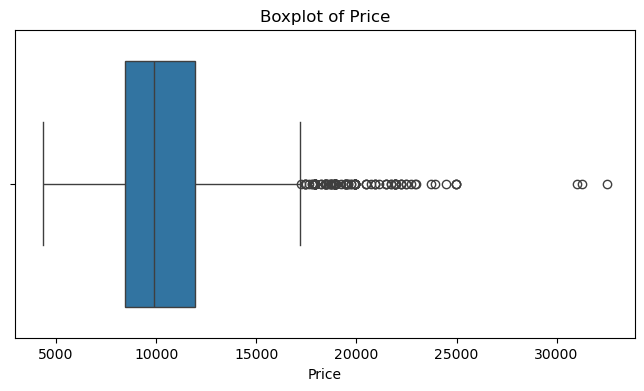

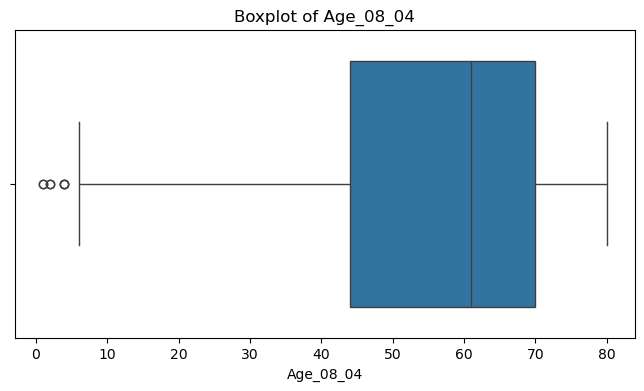

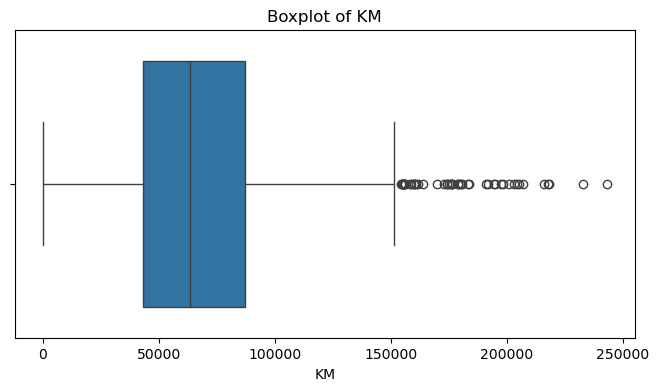

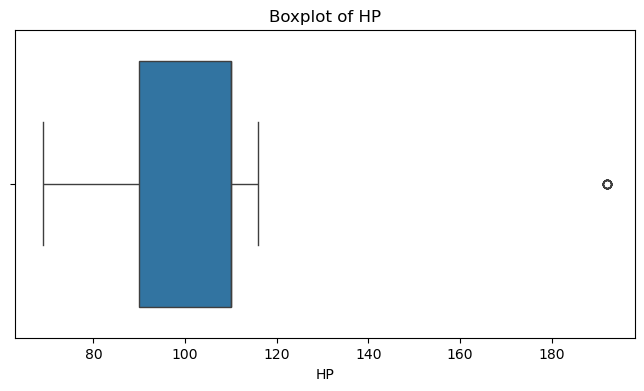

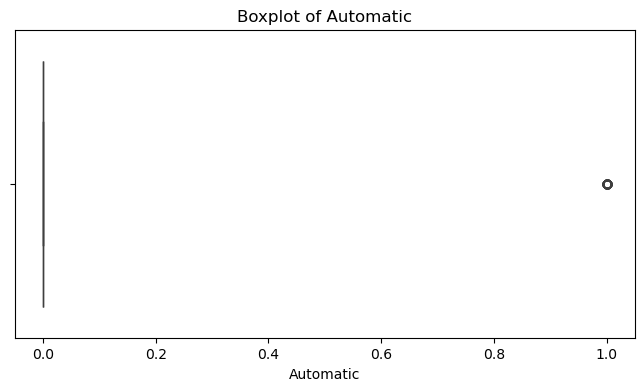

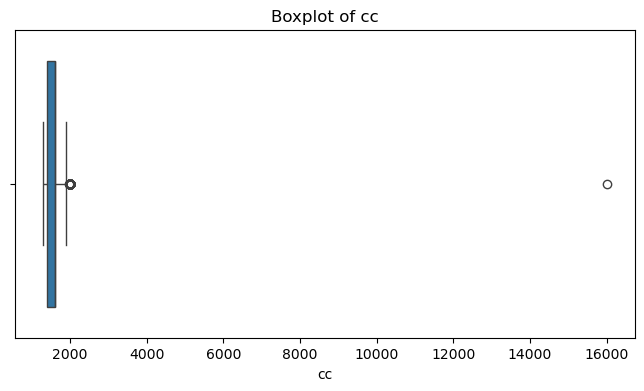

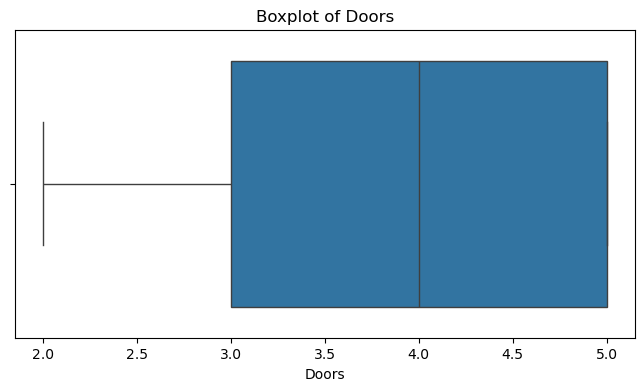

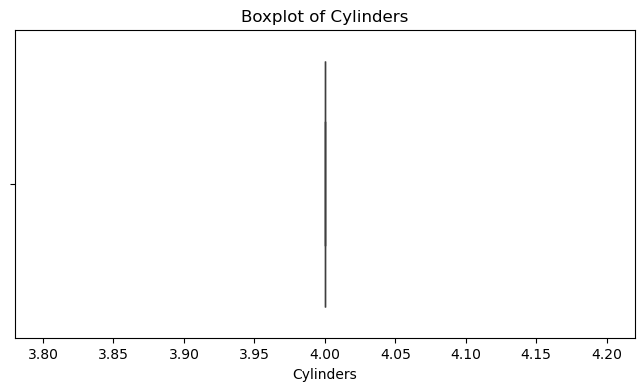

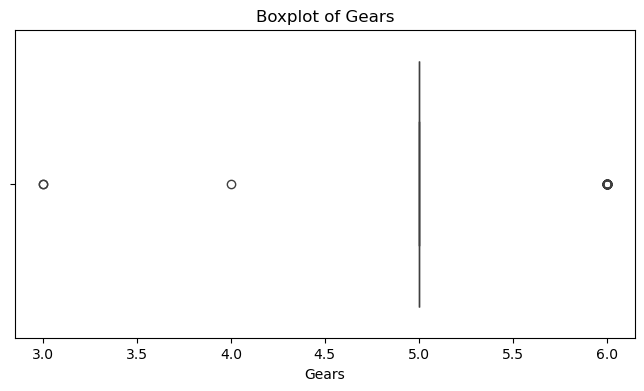

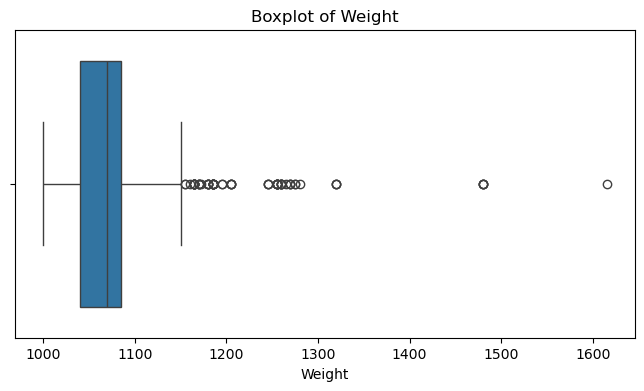

In [ ]:
num_columns=df.select_dtypes(include=("number")).columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()


# the range of price age km hp weight is high

numerical_cols=df.select_dtypes(include=['number']).columns

# Identify columns with outliers using boxplots (replace with your actual outlier detection logic if needed)
outlier_cols = []  # Initialize an empty list
for col in numerical_cols:
    # Example outlier detection (replace with your own criteria):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0 :
      outlier_cols.append(col)
      
print(df.describe())


outlier_list = outlier_cols[2],outlier_cols[7]
outlier_list

# Replace outliers with the median for each identified column

for _ in range(8):
  for col in outlier_list:
    median_val = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val
    

# the col which contains outliers
outlier_cols

# scatter plot

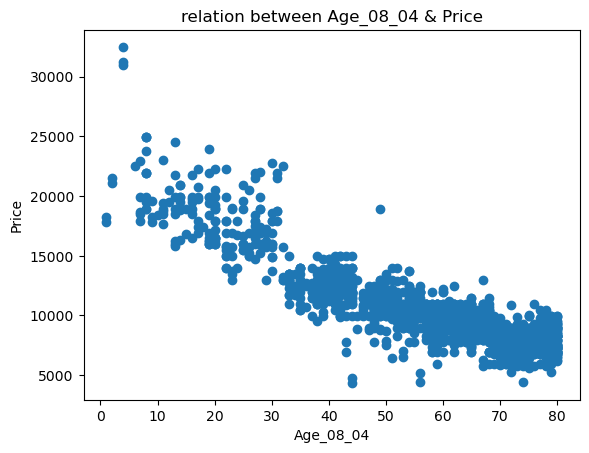

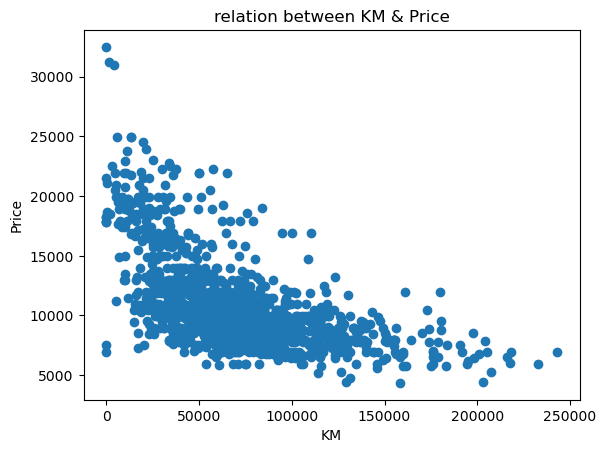

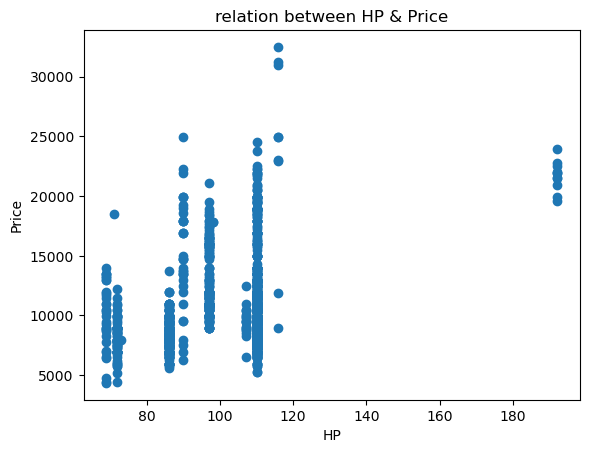

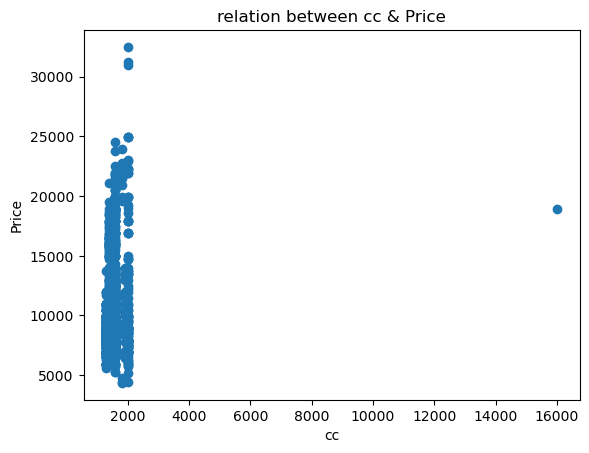

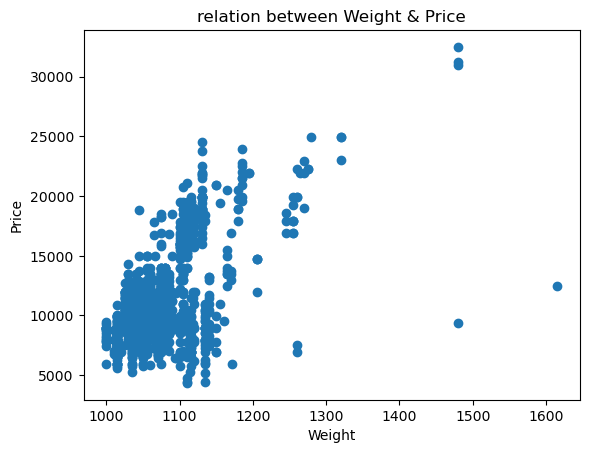

In [ ]:
#Identify the few independent  var from above visualizations and dependent variable is alrady known.
# by understaning  above visualizations selected few  numerical columns to Explore  relationship of different  variables with  target var
continuous_var=['Age_08_04','KM','HP','cc','Weight']
for i in continuous_var:
# Plot the independent variable on x-axis  Plot the dependent variable on y-axis
    plt.scatter(x=df[i],y=df['Price'])
    plt.title(f"relation between {i} & {'Price'}")
   # plt.plot(df[i],df["Price"])
    plt.plot()
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

- as we observe   THAT  if AGE   & KM increses vehcile price decreses .hence negative relation
- as we observe  THAT   if  weight & hp increses price increses.hence positive relation
-  the above  plots a shows a linear pattern, meaning that the observations move
together.
-cc represents data that doesn’t have a
pattern.

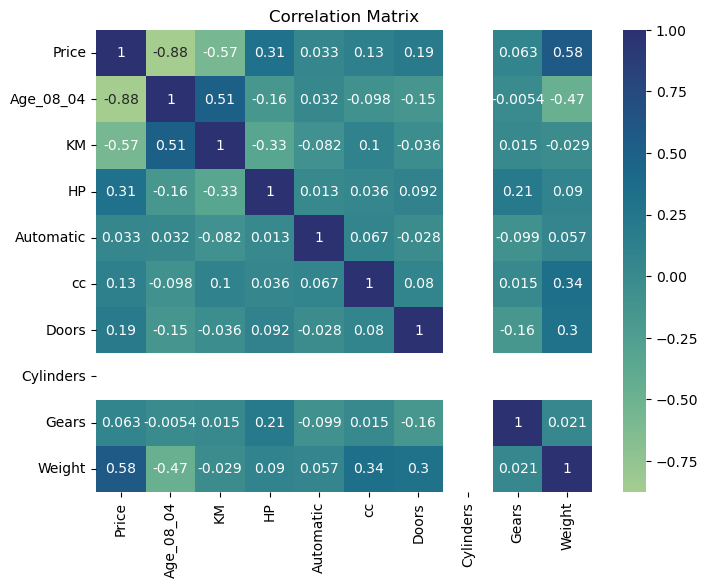

In [ ]:
numeric_data = df.select_dtypes(include=["number"])
#df1=df.iloc[:,[0,1,2,4,10]]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest")
plt.title("Correlation Matrix")
plt.show()

## Data Transformation


- So we are applying  a standardization  on numeric variables in dataset which bring Brings all features onto a common scale..the resultant dataset is called Standard Normal distribution


In [ ]:
#Using column indexing with a list
num=df.iloc[:, [1,2,10]]
num

,Age_08_04,KM,Weight
0,23,46986,1165
1,23,72937,1165
2,24,41711,1165
3,26,48000,1165
4,30,38500,1170
...,...,...,...
1431,69,20544,1025
1432,72,19000,1015
1433,71,17016,1015
1434,70,16916,1015


- Keeping the target variable in its original scale makes the predictions interpretable and meaningful in the context of your problem (e.g., currency units like dollars or rupees).

- Standardizing the target variable could make the predicted values harder to interpret since they would be in standardized units instead of the original units.

# MinMaxScaler:  using this bcz variables not following normla distribution and contains outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SS=MinMaxScaler()
standardized=pd.DataFrame(SS.fit_transform(num))
#standardized.columns=['Price','Age_08_04','KM','Weight']
standardized.columns=['Age_08_04','KM','Weight']

standardized

,Age_08_04,KM,Weight
0,0.278481,0.193355,0.268293
1,0.278481,0.300149,0.268293
2,0.291139,0.171647,0.268293
3,0.316456,0.197528,0.268293
4,0.367089,0.158433,0.276423
...,...,...,...
1431,0.860759,0.084539,0.040650
1432,0.898734,0.078186,0.024390
1433,0.886076,0.070021,0.024390
1434,0.873418,0.069609,0.024390


In [ ]:
obj=df[["Fuel_Type"]]
obj

,Fuel_Type
0,Diesel
1,Diesel
2,Diesel
3,Diesel
4,Diesel
...,...
1431,Petrol
1432,Petrol
1433,Petrol
1434,Petrol


In [ ]:
# LabelEncoding
from sklearn.preprocessing import  LabelEncoder
Dummy_col= LabelEncoder()

Dummy_col =pd.DataFrame( Dummy_col.fit_transform(obj))
Dummy_col.columns=['Fuel_Type']
Dummy_col

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Fuel_Type
0,1
1,1
2,1
3,1
4,1
...,...
1431,2
1432,2
1433,2
1434,2


In [ ]:
target_var= df["Price"]
target_var

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [ ]:
# concat
df_final=pd.concat([target_var,standardized,Dummy_col] ,axis=1)
df_final


,Price,Age_08_04,KM,Weight,Fuel_Type
0,13500,0.278481,0.193355,0.268293,1
1,13750,0.278481,0.300149,0.268293,1
2,13950,0.291139,0.171647,0.268293,1
3,14950,0.316456,0.197528,0.268293,1
4,13750,0.367089,0.158433,0.276423,1
...,...,...,...,...,...
1431,7500,0.860759,0.084539,0.040650,2
1432,10845,0.898734,0.078186,0.024390,2
1433,8500,0.886076,0.070021,0.024390,2
1434,7250,0.873418,0.069609,0.024390,2


In [ ]:
df_final.corr()


,Price,Age_08_04,KM,Weight,Fuel_Type
Price,1.000000,-0.876590,-0.569960,0.581198,-0.022157
Age_08_04,-0.876590,1.000000,0.505672,-0.470253,0.080261
KM,-0.569960,0.505672,1.000000,-0.028598,-0.420586
Weight,0.581198,-0.470253,-0.028598,1.000000,-0.505303
Fuel_Type,-0.022157,0.080261,-0.420586,-0.505303,1.000000


# there are no  two variables which are highly correlated. (the independent variables are  highly correlated with each other).Hence we can confirm no multicolinaRITY issue exist.
# Age_08_04  & KM  are correlated (0.50) ,but less correlation  exits between them , when compared there corr  with the corr of price .

#  Split the dataset into training and testing sets

In [ ]:
Y=df_final['Price']
X=df_final[['Age_08_04']]
X

,Age_08_04
0,0.278481
1,0.278481
2,0.291139
3,0.316456
4,0.367089
...,...
1431,0.860759
1432,0.898734
1433,0.886076
1434,0.873418


# - 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.


# MODEL1

In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import root_mean_squared_error,r2_score
model = LinearRegression()

training_err = []
test_err = []
train_r2 = []
test_r2 = []

for i in range(1,101):
# DATA PARTITION
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)

    model.fit(X_train,Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_err.append(root_mean_squared_error(Y_train,Y_pred_train))
    test_err.append(root_mean_squared_error(Y_test,Y_pred_test))
    train_r2.append(r2_score(Y_train,Y_pred_train))
    test_r2.append(r2_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_r2),2))
print("Cross validation test score:", np.round(np.mean(test_r2),2))
#print(X_train,X_test,Y_train,Y_test)


Cross validation traning error: 1740.26
Cross validation test error: 1753.08
Cross validation traning score: 0.77
Cross validation test score: 0.76


In [ ]:
model.coef_
# here we observed negative linear relationship, and  -0.57 indicates that for evry -0.57 unit incres in the indepndent var the dpen var y incre by -0.57 units   ....


#the sign indicates the direcion of the relationship +  -

#Correlation and the slope of a linear regression line should generally have the same sign.
# IF my corr is  + my slope should also be  + can be seen in  postive linear relationship.
# IF my corr is  - my slope should also be  - can be seen in  negative linear relationship.
# IF my correlation is  - and if  slope returns   + The relationship between the variables might not be linear.There could be a curve or other non-linear pattern in the data that a simple linear regression is failing to capture.
#  hp is corr - is slipe  _ but sp is corr - but slope +   so ## slope i cganginh direction

array([-13620.62933959])

In [ ]:
print(X_train.head(2),"\n",X_test.head(2))
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


      Age_08_04
420    0.607595
1422   0.974684 
       Age_08_04
57     0.316456
1002   0.822785


((1005, 1), (431, 1), (1005,), (431,))

In [ ]:
print(Y_train.head(2),"\n",Y_test.head(5))

420     10500
1422     7600
Name: Price, dtype: int64 
 57      15250
1002     8250
360     12950
903      9750
1277     8800
Name: Price, dtype: int64


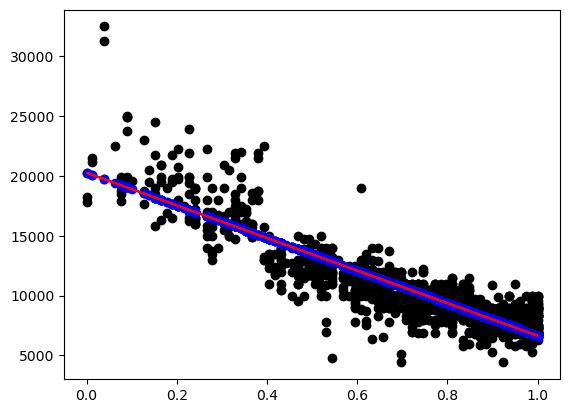

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( x=X_train ,y=Y_train,color='black')
plt.scatter( x=X_train,y=Y_pred_train,color='blue')
plt.plot( X_train,Y_pred_train,color='red')
plt.show()
# the line which is drwan on model predicted values is called linear regression line.
#as we can  actual values are not close regression line.

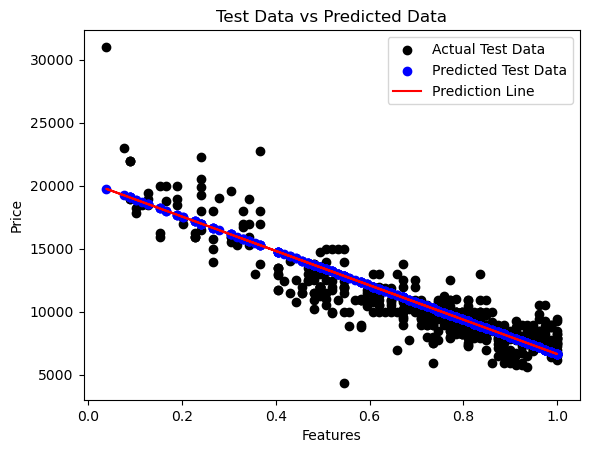

In [ ]:

# Scatter plot for actual test data
plt.scatter(x=X_test, y=Y_test, color='black', label='Actual Test Data') # Scatter plot for predicted test data
plt.scatter(x=X_test, y=Y_pred_test, color='blue', label='Predicted Test Data') # Plot the prediction line (optional, if your model is linear)
plt.plot(X_test, Y_pred_test, color='red', label='Prediction Line') # Adding labels and legend
plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Test Data vs Predicted Data')
plt.legend() # Show the plot plt.show()

# MODEL2

In [ ]:
X2=df_final[['Age_08_04','Weight']]
Y2=df_final['Price']


#### Single Train-Test Split with Fixed Random State

#### Cross-Validation with Different Random States

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
model2 = LinearRegression()

training_err = []
test_err = []
train_r2 = []
test_r2 = []

for i in range(1,101):
    X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2, test_size = 0.3 ,random_state=i)
    model2.fit(X2_train,Y2_train)
    Y2_pred_train = model2.predict(X2_train)
    Y2_pred_test = model2.predict(X2_test)

    training_err.append(root_mean_squared_error(Y2_train,Y2_pred_train))
    test_err.append(root_mean_squared_error(Y2_test,Y2_pred_test))
    train_r2.append(r2_score(Y2_train,Y2_pred_train))
    test_r2.append(r2_score(Y2_test,Y2_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_r2),2))
print("Cross validation test score:", np.round(np.mean(test_r2),2))

#print(X2_train,X2_test,Y2_train,Y2_test)

Cross validation traning error: 1595.42
Cross validation test error: 1617.96
Cross validation traning score: 0.81
Cross validation test score: 0.8


# model3

In [ ]:
X3=df_final[['Age_08_04','Weight','KM']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
model3= LinearRegression()

training_err = []
test_err = []
train_r2 = []
test_r2 = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X3,Y, test_size = 0.3, random_state=i)

    model3.fit(X_train,Y_train)

    Y_pred_train = model3.predict(X_train)
    Y_pred_test = model3.predict(X_test)
    training_err.append(root_mean_squared_error(Y_train,Y_pred_train))
    test_err.append(root_mean_squared_error(Y_test,Y_pred_test))
    train_r2.append(r2_score(Y_train,Y_pred_train))
    test_r2.append(r2_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_r2),2))
print("Cross validation test score:", np.round(np.mean(test_r2),2))
#print(X_train,X_test,Y_train,Y_test)


Cross validation traning error: 1407.45
Cross validation test error: 1434.15
Cross validation traning score: 0.85
Cross validation test score: 0.84


In [ ]:
model3.coef_
#the slope and correlation  of 3 variables are in same direction sowing linear relationship

array([-8890.34535449, 14634.18736045, -6458.79297189])



1. **Model Evaluation with Three Variables**:
   - When three variables (`Age_08_04`, `Weight`, and `KM`) are used to predict `Price`, the variation between the training score (R² = 85%) and testing score (R² 4 82%) is minimal, indicating a well-fitting model.

2. **Impact of Adding Variables**:
   - As you add more variables like `Weight` and `KM`, both the training and test errors decrease, while the R² scores increase. This suggests that these additional variables help the model explain more of the variability in `Price`.

3. **Multicollinearity Analysis**:
   - The decrease in RMSE and increase in R² scores with each added variable suggest that multicollinearity is not a significant issue.
   - 85% of the predicted values match the actual values, indicating strong model performance.

4. **Comparison of Models**:
   - The third model (using `Age_08_04`, `Weight`, and `KM`) has the highest R² and the lowest RMSE compared to the first model (using `Age_08_04` alone) and the second model (using `Age_08_04` and th your analysis?

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Age_08_04+Weight+KM',data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:58:25   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.758e+04    166.178    105.763      0.000    1.72e+04    1.79e+04
Age_08_04  -9497.4727    216.632    -43.841      0.000   -9922.423   -9072.522
Weight      1.204e+04    514.291     23.409      0.000     1.1e+04     1.3e+04
KM         -5876.4201    291.753    -20.142      0.000   -6448.729   -5304.111
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X2 is your DataFrame with independent variables
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns
vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(len(X3.columns))]

print(vif_data)
# vif is less than 5 so we can go with thiss variables

     feature       VIF
0  Age_08_04  5.850653
1     Weight  2.006943
2         KM  6.230989


# Lasso and redige

In [ ]:
#Using column indexing with a list
continous=df.iloc[:, [1,2,4,5,6,7,8,9,10]]
continous

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,90,0,2000,3,4,5,1165
1,23,72937,90,0,2000,3,4,5,1165
2,24,41711,90,0,2000,3,4,5,1165
3,26,48000,90,0,2000,3,4,5,1165
4,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025
1432,72,19000,86,0,1300,3,4,5,1015
1433,71,17016,86,0,1300,3,4,5,1015
1434,70,16916,86,0,1300,3,4,5,1015


In [ ]:
continous.skew()

Age_08_04    -0.826702
KM            1.015912
HP            0.955836
Automatic     3.878197
cc           27.431793
Doors        -0.076395
Cylinders     0.000000
Gears         2.283960
Weight        3.108639
dtype: float64

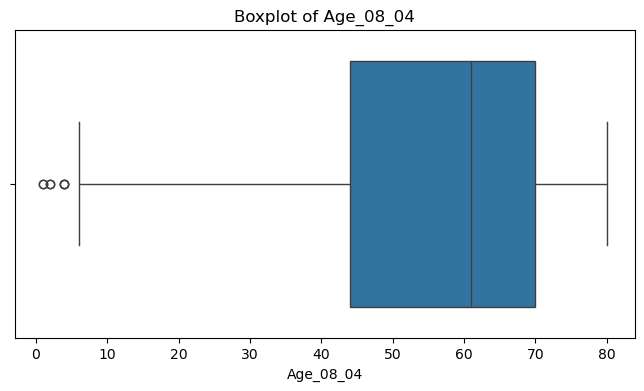

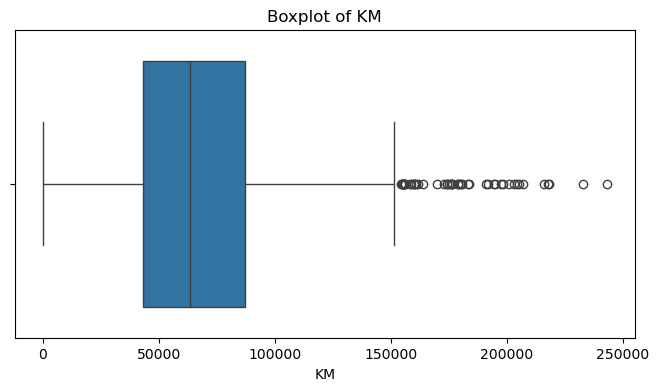

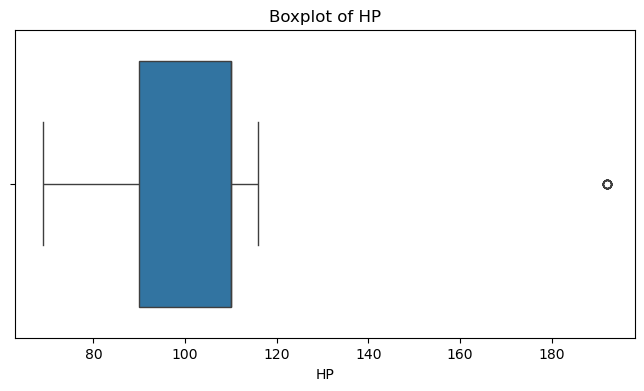

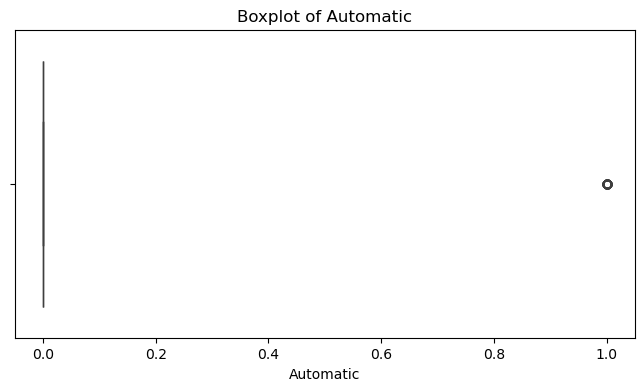

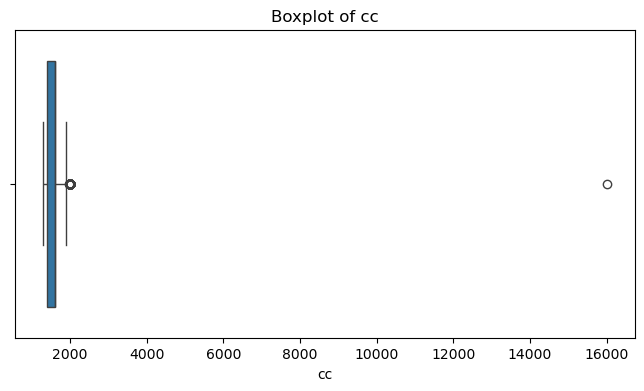

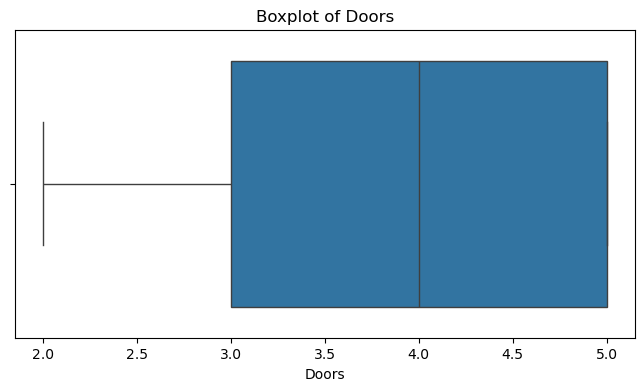

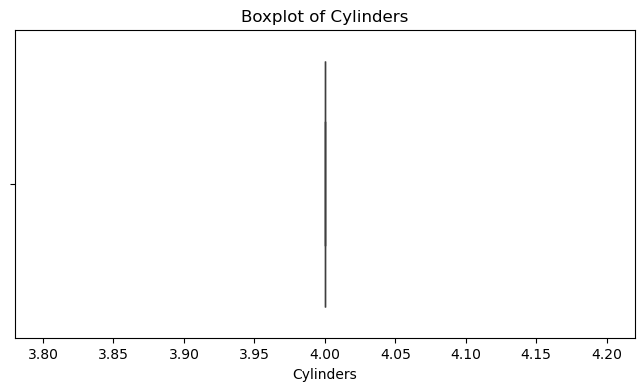

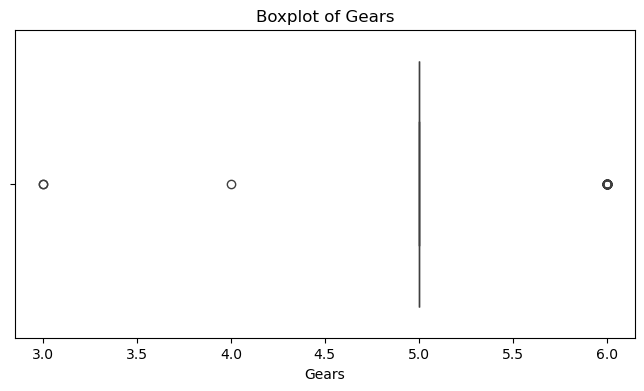

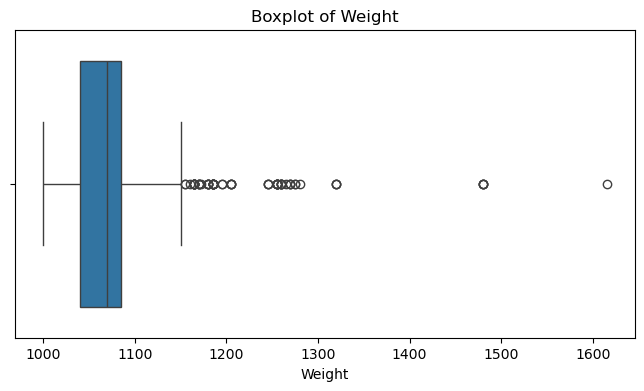

In [ ]:

for col in continous:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
# Identify columns with outliers using boxplots (replace with your actual outlier detection logic if needed)
outlier_cols = []  # Initialize an empty list
for col in continous:
    # Example outlier detection (replace with your own criteria):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0 :
      outlier_cols.append(col)

outlier_cols
print(df.describe())


outlier_list = outlier_cols[1],outlier_cols[6] #['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Gears', 'Weight']
outlier_list

# Replace outliers with the median for each identified column

for _ in range(8):
  for col in outlier_list:
    median_val = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

C:\Users\Basma\AppData\Local\Temp\ipykernel_1544\3879326683.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63389.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val


In [ ]:
from sklearn.preprocessing import MinMaxScaler
SS=MinMaxScaler()
standardized2=pd.DataFrame(SS.fit_transform(continous))
standardized2.columns=['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']
standardized2

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.278481,0.193355,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293
1,0.278481,0.300149,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293
2,0.291139,0.171647,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293
3,0.316456,0.197528,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293
4,0.367089,0.158433,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.860759,0.084539,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.040650
1432,0.898734,0.078186,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.024390
1433,0.886076,0.070021,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.024390
1434,0.873418,0.069609,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.024390


In [ ]:
# concat
df2=pd.concat([target_var,standardized2,Dummy_col] ,axis=1)
df2


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type
0,13500,0.278481,0.193355,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
1,13750,0.278481,0.300149,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
2,13950,0.291139,0.171647,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
3,14950,0.316456,0.197528,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
4,13750,0.367089,0.158433,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.276423,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.860759,0.084539,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.040650,2
1432,10845,0.898734,0.078186,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.024390,2
1433,8500,0.886076,0.070021,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.024390,2
1434,7250,0.873418,0.069609,0.138211,0.0,0.000000,0.333333,0.0,0.666667,0.024390,2


#  INDEPENDENT  AND dependent variables

In [ ]:
Y4 = df2["Price"]
#X = df_final.drop(df_final.columns[16:17],axis=1)
#X5= df2.drop(df2.columns[0],axis=1)
X4=df2.iloc[:, [1,2,3,4,5,6,7,8,9,10]]

#X = df_final.iloc[:,1:17]  # printing  all col
X4.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type
0,0.278481,0.193355,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
1,0.278481,0.300149,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
2,0.291139,0.171647,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
3,0.316456,0.197528,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.268293,1
4,0.367089,0.158433,0.170732,0.0,0.047619,0.333333,0.0,0.666667,0.276423,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
model = LinearRegression()

training_err = []
test_err = []
train_r2 = []
test_r2 = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X4,Y4, test_size = 0.3, random_state=i)

    model.fit(X_train,Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_err.append(root_mean_squared_error(Y_train,Y_pred_train))
    test_err.append(root_mean_squared_error(Y_test,Y_pred_test))
    train_r2.append(r2_score(Y_train,Y_pred_train))
    test_r2.append(r2_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_r2),2))
print("Cross validation test score:", np.round(np.mean(test_r2),2))
#print(X_train,X_test,Y_train,Y_test)


Cross validation traning error: 1320.98
Cross validation test error: 1482.6
Cross validation traning score: 0.87
Cross validation test score: 0.83


- **as we can see the  train error  is low (has low bias ) &  the  test error  is high (has high variation )**
**Hence model is overfitted ,means model is not predicting correctly on test data.**
- the variation between train error & test error is also high .
- traning score high  and test score are low , and there is very less variation between  them.
- ** SO TO OVERCOMe this we apply regulirization methods called lasso and ridge, and find out which  variables are really important in predicting price.**

# Ridge

### grid search cv : Ridge :- selects the best alpha value  by  using Cross-validation  technique
### the coeff values will be shrink to  near to  0,then that var can be removed.

In [ ]:
# grid search cv
# Set up the grid of alpha values to search over
alpha_values = {'alpha': [0.01, 0.1,0.5, 1,1.5,2,2.5,3,3.5,4.8]}

# Use GridSearchCV to find the best alpha
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Ridge(), param_grid=alpha_values, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value found: {best_alpha}")

Best alpha value found: 0.5


In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=4.8)

X_train,X_test,Y_train,Y_test = train_test_split(X4,Y4, test_size = 0.3, random_state=100)

RR.fit(X_train,Y_train)
RR.coef_

d1 = pd.DataFrame(list(X4))
d2 = pd.DataFrame(RR.coef_)
pd.concat([d1,d2],axis=1)


,0,0
0,Age_08_04,-9813.031307
1,KM,-4025.923596
2,HP,3299.974539
3,Automatic,483.115589
4,cc,370.665450
5,Doors,408.912325
6,Cylinders,0.000000
7,Gears,1368.862375
8,Weight,7122.603865
9,Fuel_Type,132.347391


## ridge is not wroking well here  so go for lasso

# grid search cv :Lasso
### the coeff values will be shrink to extact  0,then that var can be removed.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=100)

X4_train,X4_test,Y4_train,Y4_test = train_test_split(X4,Y4, test_size = 0.3, random_state=100)

lasso.fit(X4_train,Y4_train)
lasso.coef_

d1 = pd.DataFrame(list(X4))
d2 = pd.DataFrame(lasso.coef_)
pd.concat([d1,d2],axis=1)


,0,0
0,Age_08_04,-11705.928839
1,KM,-296.537978
2,HP,0.000000
3,Automatic,0.000000
4,cc,0.000000
5,Doors,0.000000
6,Cylinders,0.000000
7,Gears,0.000000
8,Weight,0.000000
9,Fuel_Type,0.000000


In [ ]:
# grid search cv
# Set up the grid of alpha values to search over
alpha_values = {'alpha': [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Use GridSearchCV to find the best alpha
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Lasso(), param_grid=alpha_values,  cv=10)
grid_search.fit(X4_train, Y4_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value found: {best_alpha}")
best_score = grid_search.best_score_
print(f"Best cross-validation score: {best_score}")


Best alpha value found: 2
Best cross-validation score: 0.8683399363581055


### DROP   Fuel_Type	Automatic	cc	Doors	Cylinders	as we can its coff shrink to 0.
- NOw  check if  rmse   is decresed or not


In [ ]:
X5=df2.iloc[:, [1,2,3,8,9]]
X5

,Age_08_04,KM,HP,Gears,Weight
0,0.278481,0.193355,0.170732,0.666667,0.268293
1,0.278481,0.300149,0.170732,0.666667,0.268293
2,0.291139,0.171647,0.170732,0.666667,0.268293
3,0.316456,0.197528,0.170732,0.666667,0.268293
4,0.367089,0.158433,0.170732,0.666667,0.276423
...,...,...,...,...,...
1431,0.860759,0.084539,0.138211,0.666667,0.040650
1432,0.898734,0.078186,0.138211,0.666667,0.024390
1433,0.886076,0.070021,0.138211,0.666667,0.024390
1434,0.873418,0.069609,0.138211,0.666667,0.024390


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error,r2_score
lasso = Lasso(alpha=100)

training_err = []
test_err = []
train_r2 = []
test_r2 = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X5,Y4, test_size = 0.3, random_state=i)

    lasso.fit(X_train,Y_train)

    Y_pred_train = lasso.predict(X_train)
    Y_pred_test = lasso.predict(X_test)
    training_err.append(root_mean_squared_error(Y_train,Y_pred_train))
    test_err.append(root_mean_squared_error(Y_test,Y_pred_test))
    train_r2.append(r2_score(Y_train,Y_pred_train))
    test_r2.append(r2_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_r2),2))
print("Cross validation test score:", np.round(np.mean(test_r2),2))

# LASSO MODEL   rmse is much higher &  r2 is lowercompared with  linear model

Cross validation traning error: 1780.93
Cross validation test error: 1791.88
Cross validation traning score: 0.76
Cross validation test score: 0.75


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
model = LinearRegression()

training_err = []
test_err = []
train_r2 = []
test_r2 = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X5,Y4, test_size = 0.3, random_state=i)

    model.fit(X_train,Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_err.append(root_mean_squared_error(Y_train,Y_pred_train))
    test_err.append(root_mean_squared_error(Y_test,Y_pred_test))
    train_r2.append(r2_score(Y_train,Y_pred_train))
    test_r2.append(r2_score(Y_test,Y_pred_test))

print("Cross validation traning error:", np.round(np.mean(training_err),2))
print("Cross validation test error:", np.round(np.mean(test_err),2))
print("Cross validation traning score:", np.round(np.mean(train_r2),2))
print("Cross validation test score:", np.round(np.mean(test_r2),2))

Cross validation traning error: 1336.85
Cross validation test error: 1367.0
Cross validation traning score: 0.86
Cross validation test score: 0.86


- **as we can see the  train error  is low (has low bias ) &  the  test error  is low (has low variation ).**
- the variation between train error & test error is low .
- traning score and test score are high , and there is no variation between  them. **hence best fit model** .

1.What is Normalization & Standardization and how is it helpful?


- Normalization scales the features to a fixed range, typically between 0 and 1, or -1 and 1. This is especially useful when the data does not
follow a Gaussian distribution or has outliers.( Min-Max Normalization)
- Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This method is useful when the data follows a
Gaussian (normal) distribution and is often a prerequisite for many machine learning algorithms.(Z-score Standardization)
- Prevents features with larger scales from dominating the learning process.

2.What techniques can be used to address multicollinearity in multiple linear regression?
- When we add variables and r2 do not increse   due to  multicollinearity  .
- it means the independent variables have strong correlation  between them when compared with target variable .
- 1. Remove highly correlated variables: If two variables are highly correlated, consider removing one.
- 2. "This can be addressed by calculating the Variance Inflation Factor (VIF) using the statsmodels library. If the VIF value is less than 5,
   that variable can be used for model prediction."  variables whose vif level is  > 10 can be ignored.
- 3. Regularization (Lasso or Ridge): These techniques penalize large coefficients, helping to reduce the impact of multicollinearity.


1. obsrving corr i found  from11 variables only 3 variable have highest corr with price . so i fiited only those var in LINEAR model to make predictons.
2. the r2  is 85 we can say  best fit model. BUT we will  fit other variables and see if r2 increses and rmse  decreses .
- Cross validation traning error: 1407.45
- Cross validation test error: 1434.15
- Cross validation traning score: 0.85
- Cross validation test score: 0.84
    
3. BUT we will  fit other variables and see if r2  increses and rmse  decreses
4. removed outliers  from weight and km .  
5. taken all variables and fitted in model ,the score is incresed but  got more  variance .  
- Cross validation traning error: 1320.98
- Cross validation test error: 1482.6
- Cross validation traning score: 0.87
- Cross validation test score: 0.83
    
6. we will apply regulization methods  ,SO to find out  which  var is not imp in making predictions  and remove them  and obsrve if r2 increses. and rmse decreses.
7.  and finally   the vairiance is decresed and score is  decresed  1 unit but can be acccepted.
- Cross validation traning error: 1336.85
- Cross validation test error: 1367.0
- Cross validation traning score: 0.86
- Cross validation test score: 0.86